In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\ss\Desktop\Customer_churn\customer_churn.csv",skipinitialspace=True,encoding="latin1",na_values="?")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.memory_usage(deep=True)

Index                  128
customerID          471881
gender              436599
SeniorCitizen        56344
Partner             418939
Dependents          417647
tenure               56344
PhoneService        421898
MultipleLines       428056
InternetService     445822
OnlineSecurity      443498
OnlineBackup        443908
DeviceProtection    443901
TechSupport         443523
StreamingTV         444186
StreamingMovies     444211
Contract            481045
PaperlessBilling    419708
PaymentMethod       532241
MonthlyCharges       56344
TotalCharges         56344
Churn               417406
dtype: int64

In [9]:
df.Churn.nbytes

56344

In [10]:
import sys 
sys.getsizeof(df)

7779989

# A) Data Manipulation


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
customer_5=df.iloc[:,5]

In [16]:
customer_5

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [17]:
customer_15=df.iloc[:,15]

In [18]:
customer_15

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

In [19]:
df[(df["SeniorCitizen"]==1) & (df["gender"]=="Male")&( df["PaymentMethod"]=="Electronic check")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [20]:
senior_male_electronic=df[(df["SeniorCitizen"]==1) & (df["gender"]=="Male")&( df["PaymentMethod"]=="Electronic check")]

In [21]:
df[(df["tenure"]>70) &(df["MonthlyCharges"]>=100)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,3508-CFVZL,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.90,No
6934,6257-DTAYD,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.15,7365.30,No
6992,0218-QNVAS,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No


In [22]:
customer_total_tenure=df[(df["tenure"]>70) &(df["MonthlyCharges"]>=100)]

In [23]:
df[(df["Contract"]=="Two year")&(df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [24]:
two_mail_yes=df[(df["Contract"]=="Two year")&(df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")]


In [25]:
df.sample(333,random_state=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1778,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,No
5036,1268-ASBGA,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,Yes
1106,4159-NAAIX,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No
1665,1219-NNDDO,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,No
927,9625-QSTYE,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,6705-LNMDD,Male,0,No,No,20,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,50.00,1003.05,No
6779,0076-LVEPS,Male,0,No,Yes,29,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,45.00,1242.45,No
6244,5331-RGMTT,Male,1,Yes,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No
5126,4188-FRABG,Male,0,Yes,No,57,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,103.05,5925.75,No


In [26]:
customer_333=df.sample(333,random_state=1)

In [27]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

# B) Data Visualization: 


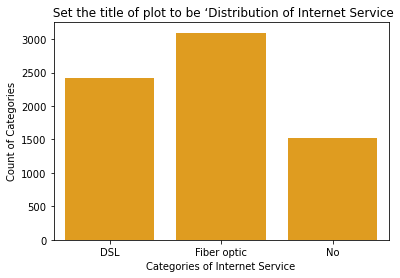

In [28]:
sns.countplot(data=df,x="InternetService",color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title(" Set the title of plot to be ‘Distribution of Internet Service")
plt.show()

<Figure size 720x432 with 0 Axes>

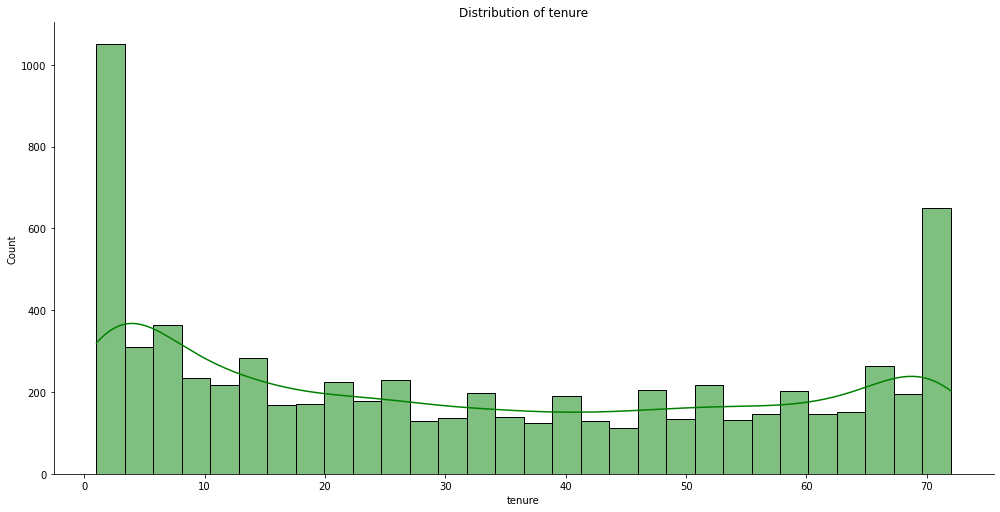

In [29]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x="tenure",kind="hist",bins=30,color="green",kde=True,height=7,aspect=2)
plt.title("Distribution of tenure",)
plt.show()

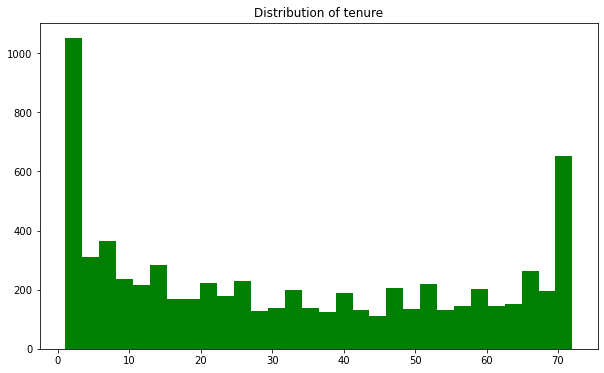

In [30]:
plt.figure(figsize=(10,6))
plt.hist(df["tenure"],bins=30,color="green")
plt.title("Distribution of tenure")
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

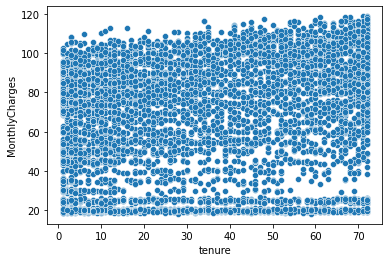

In [31]:
sns.color_palette("YlOrBr", as_cmap=True)
sns.scatterplot(data=df,y="MonthlyCharges",x="tenure",palette="ch:r=-.5,l=.75")

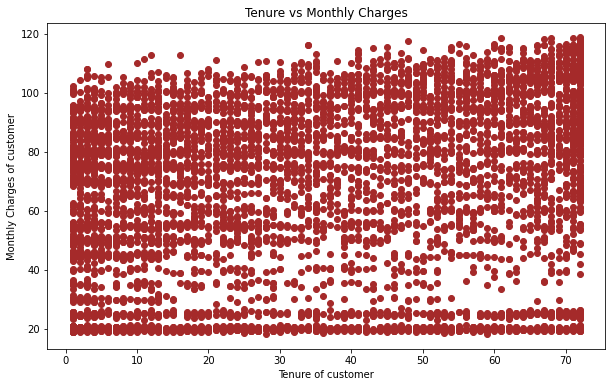

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y=df["MonthlyCharges"],x=df["tenure"],c="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

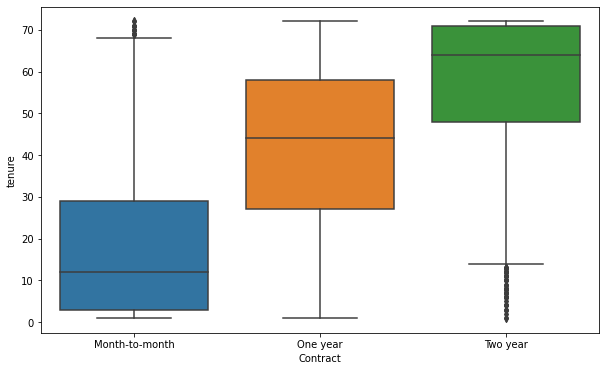

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Contract",y="tenure")
plt.show()

# C) Linear Regression: 


In [34]:
X=df["MonthlyCharges"]
y=df["tenure"]

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=42)

In [36]:
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [38]:
lr.predict(xtest)

array([[24.66773192],
       [24.60870839],
       [39.86628951],
       ...,
       [23.77254179],
       [30.70780593],
       [39.83677774]])

In [39]:
ypred=lr.predict(xtest)

In [40]:
lr.score(xtest,ytest)

0.06815183635423328

In [41]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [42]:
mean_absolute_error(ypred,ytest)

20.653991240210363

In [43]:
mean_absolute_error(lr.predict(xtrain),ytrain)

21.07614140294482

In [44]:
mean_absolute_percentage_error(ypred,ytest)

0.6554470595124942

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [46]:
mean_squared_error(ypred,ytest)

551.6690288117936

In [47]:
mean_absolute_percentage_error(ypred,ytest)

0.6554470595124942

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ypred,ytest))

23.487635658188196

In [49]:
error=np.sqrt(mean_squared_error(ypred,ytest))

# D) Logistic Regression


In [50]:
X=df["MonthlyCharges"]
y=df["Churn"]

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.35)

In [52]:
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
model.predict(xtest)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [56]:
ypredlr=model.predict(xtest)

In [57]:
model.score(xtest,ytest)

0.7408610885458976

In [58]:
model.score(xtrain,ytrain)

0.7306345733041576

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
accuracy_score(ypredlr,ytest)

0.7408610885458976

In [61]:
accuracy_score(model.predict(xtrain),ytrain)

0.7306345733041576

<AxesSubplot:>

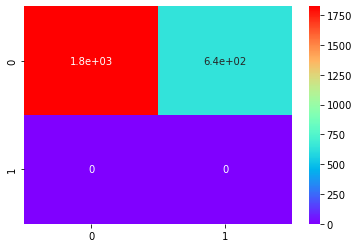

In [64]:
sns.heatmap(confusion_matrix(ypredlr,ytest),annot=True,cmap="rainbow")

In [66]:
print(classification_report(ypredlr,ytest))

              precision    recall  f1-score   support

          No       1.00      0.74      0.85      2462
         Yes       0.00      0.00      0.00         0

    accuracy                           0.74      2462
   macro avg       0.50      0.37      0.43      2462
weighted avg       1.00      0.74      0.85      2462



In [67]:
confusion_matrix(ypredlr,ytest)

array([[1824,  638],
       [   0,    0]], dtype=int64)

In [69]:
1824/(1824+638)      #Accuracy Score

0.7408610885458976

In [70]:
X=df[["tenure","MonthlyCharges"]]
y=df["Churn"]

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=.20)

In [72]:
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [73]:
mod=LogisticRegression()
mod.fit(xtrain,ytrain)

LogisticRegression()

In [75]:
mod.predict(xtest)

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
ypredlr2=mod.predict(xtest)

In [79]:
confusion_matrix(ypredlr2,ytest)

array([[938, 215],
       [ 95, 159]], dtype=int64)

In [80]:
accuracy_score(ypredlr2,ytest)

0.7796730632551528

In [82]:
(938+159)/(215+95+938+159)    # Accuracy Score

0.7796730632551528

# E) Decision Tree: 


In [83]:
X=df["tenure"]
y=df["Churn"]

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=.20)

In [85]:
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [88]:
dt.predict(xtest)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [89]:
ypreddt=dt.predict(xtest)

In [90]:
confusion_matrix(ypreddt,ytest)

array([[938, 255],
       [ 95, 119]], dtype=int64)

In [91]:
accuracy_score(ypreddt,ytest)

0.7512437810945274

In [93]:
(938+119)/(95+255+938+119)

0.7512437810945274

# F) Random Forest: 


In [ ]:
X=df[["tenure","MonthlyCharges"]]
y=df["Churn"]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=.20)

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [96]:
rf.predict(xtest)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [97]:
ypredrf=rf.predict(xtest)

In [98]:
confusion_matrix(ypredrf,ytest)

array([[938, 255],
       [ 95, 119]], dtype=int64)

In [99]:
accuracy_score(ypredrf,ytest)

0.7512437810945274

In [100]:
(938+119)/(938+119+255+95)

0.7512437810945274